In [1]:
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger
from numpy.polynomial.polynomial import Polynomial
from pydantic import BaseModel
from typing import List, Tuple
from scipy.optimize import curve_fit


In [2]:
x_values = [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
y_values = [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]

In [40]:
def fit_polynomial(data_x: List[float], data_y: List[float], degree:float = 3) -> Polynomial:
    print(f"Data x: {data_x}")
    print(f"Data y: {data_y}")

    coefs = np.polynomial.polynomial.polyfit(x_values, y_values, degree)
    logger.info(f"coefs: {coefs}")
    poly = Polynomial(coefs)


        # Compute the fitted values
    y_fitted = np.polynomial.polynomial.polyval(x_values, coefs)

    # Calculate residuals
    residuals = y_values - y_fitted

    # Compute RSS (Residual Sum of Squares)
    RSS = np.sum(residuals**2)

    # Compute TSS (Total Sum of Squares)
    TSS = np.sum((np.array(y_values) - np.mean(y_values))**2)

    # Compute R-squared
    R_squared = 1 - (RSS / TSS)

    # Print the results
    print(f"RSS: {RSS}")
    print(f"R-squared: {R_squared}")
    
    return poly

In [45]:

def fit_polynomial(data_x: List[float], data_y: List[float]) -> Polynomial:
    logger.info(f"Data x: {data_x}")
    logger.info(f"Data y: {data_y}")

    # Formulate the design matrix with only x^2 and x^4 terms
    x_values = np.array(data_x)
    y_values = np.array(data_y)
    X = np.vstack([x_values**2, x_values**4]).T

    # Perform least squares polynomial fit for the x^2 and x^4 terms
    coefs, _, _, _ = np.linalg.lstsq(X, y_values, rcond=None)
    poly = Polynomial([0, 0, coefs[0], 0, coefs[1]])

    # Compute the fitted values
    y_fitted = np.dot(X, coefs)

    # Calculate residuals
    residuals = y_values - y_fitted

    # Compute RSS (Residual Sum of Squares)
    RSS = np.sum(residuals**2)

    # Compute TSS (Total Sum of Squares)
    TSS = np.sum((y_values - np.mean(y_values))**2)

    # Compute R-squared
    R_squared = 1 - (RSS / TSS)

    # Log the results
    logger.info(f"RSS: {RSS}")
    logger.info(f"R-squared: {R_squared}")

    return poly

In [3]:
from typing import List
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from loguru import logger

def fit_polynomial(data_x: List[float], data_y: List[float]) -> Polynomial:
    logger.info(f"Data x: {data_x}")
    logger.info(f"Data y: {data_y}")

    # Formulate the design matrix with x^0 and x^4 terms
    x_values = np.array(data_x)
    y_values = np.array(data_y)
    X = np.vstack([np.ones_like(x_values), x_values, x_values**4]).T

    # Perform least squares polynomial fit for the x^0 and x^4 terms
    coefs, _, _, _ = np.linalg.lstsq(X, y_values, rcond=None)
    poly = Polynomial([coefs[0], coefs[1], 0, 0, coefs[2]])

    # Compute the fitted values
    y_fitted = np.dot(X, coefs)

    # Calculate residuals
    residuals = y_values - y_fitted

    # Compute RSS (Residual Sum of Squares)
    RSS = np.sum(residuals**2)

    # Compute TSS (Total Sum of Squares)
    TSS = np.sum((y_values - np.mean(y_values))**2)

    # Compute R-squared
    R_squared = 1 - (RSS / TSS)

    # Log the results
    logger.info(f"RSS: {RSS}")
    logger.info(f"R-squared: {R_squared}")

    return poly

# Example usage
data_x = [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
data_y = [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]

polynomial = fit_polynomial(data_x, data_y)
# logger.info(f"Polynomial: {poly}")

2024-07-10 12:34:13.798 | INFO     | __main__:fit_polynomial:7 - Data x: [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
2024-07-10 12:34:13.799 | INFO     | __main__:fit_polynomial:8 - Data y: [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]
2024-07-10 12:34:13.800 | INFO     | __main__:fit_polynomial:35 - RSS: 6.693534114439696e-09
2024-07-10 12:34:13.801 | INFO     | __main__:fit_polynomial:36 - R-squared: 0.9962868793458215


In [4]:
polynomial.roots()

array([-6.38446823e+00+0.j        ,  1.81038760e-03-6.38265836j,
        1.81038760e-03+6.38265836j,  6.38084746e+00+0.j        ])

In [5]:
f_rabi = 1.44e6
x_values = [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
y_values = [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]
new_y = (1-np.array(y_values))*(f_rabi)
# new_y = 1-np.array(y_values)
print(f"New y: {new_y}")
# y_values=list(new_y)

New y: [1654.05651036 1753.29303424 1993.84708598 2147.13697858 2743.50130855
 3139.02558478 3776.21874833]


In [6]:
polynomial = fit_polynomial(data_x=x_values, data_y=y_values)

2024-07-10 12:34:26.422 | INFO     | __main__:fit_polynomial:7 - Data x: [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
2024-07-10 12:34:26.423 | INFO     | __main__:fit_polynomial:8 - Data y: [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]
2024-07-10 12:34:26.424 | INFO     | __main__:fit_polynomial:35 - RSS: 6.693534114439696e-09
2024-07-10 12:34:26.424 | INFO     | __main__:fit_polynomial:36 - R-squared: 0.9962868793458215


In [7]:
def calculate_fitting_function_value(x: float) -> float:
    return polynomial(x)

In [8]:
def plot_data_and_fit(x_values: List[float], y_values: List[float], polynomial: Polynomial):
    
    # Generate a range of x values for plotting the fit
    x_fit = np.linspace(0, 10, 500)
    # y_fit = polynomial(x_fit+0.15)-0.00005
    y_fit = polynomial(x_fit)
    
    # Plot original data points
    plt.scatter(x_values, y_values, color='blue', label='Original Data')
    
    # Plot polynomial fit
    plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
    
    plt.xlabel('Temperature (K)')
    plt.ylabel('P_err')
    plt.title('Model 2 Polynomial Fit')
    plt.savefig('data_fit_model2.pdf')
    plt.legend()
    plt.show()

In [21]:
def polynomial_to_string(polynomial: Polynomial) -> str:
    terms = []
    for i, coef in enumerate(polynomial.coef):
        if coef != 0:
            term = f"{coef:.2e}" if i == 0 else f"{coef:.2e}x^{i}"
            terms.append(term)
    return " ".join(terms)

def plot_data_and_fit(x_values: List[float], y_values: List[float], polynomial: Polynomial):
    # Generate a range of x values for plotting the fit
    x_fit = np.linspace(0, 1.5, 500)
    y_fit = polynomial(x_fit)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot original data points
    plt.scatter(x_values, y_values, color='blue', s=100, label='Original Data')
    
    # Plot polynomial fit
    plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Polynomial Fit')
    logger.info(f"Max fidelity according to model: {np.max(y_fit)}")
    logger.info(f"Polynomial: {polynomial}")
    
    # Set labels, title, and legend
    plt.xlabel('Temperature (K)', fontsize=30)
    plt.ylabel('Fidelity 1Q', fontsize=30)
    plt.title('Polynomial Fit ', fontsize=30)
    plt.legend(fontsize=30)
    
    # poly_str = polynomial_to_string(polynomial)
    # plt.text(0.4, -0.3, f'Polynomial: {poly_str}', fontsize=30, transform=plt.gca().transAxes, ha='center')
    # Set tick size and thickness
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tick_params(axis='both', which='both', direction='in', length=6, width=2, top=True, right=True, labelsize=20)
    
    # Save and show the plot
    plt.savefig('data_fit_x1_x4.pdf', bbox_inches='tight')
    plt.show()

2024-07-10 13:19:29.215 | INFO     | __main__:plot_data_and_fit:22 - Max fidelity according to model: 0.9988615081380632
2024-07-10 13:19:29.215 | INFO     | __main__:plot_data_and_fit:23 - Polynomial: 0.99886151 - 0.00017756·x + 0.0·x² + 0.0·x³ - 0.00060186·x⁴


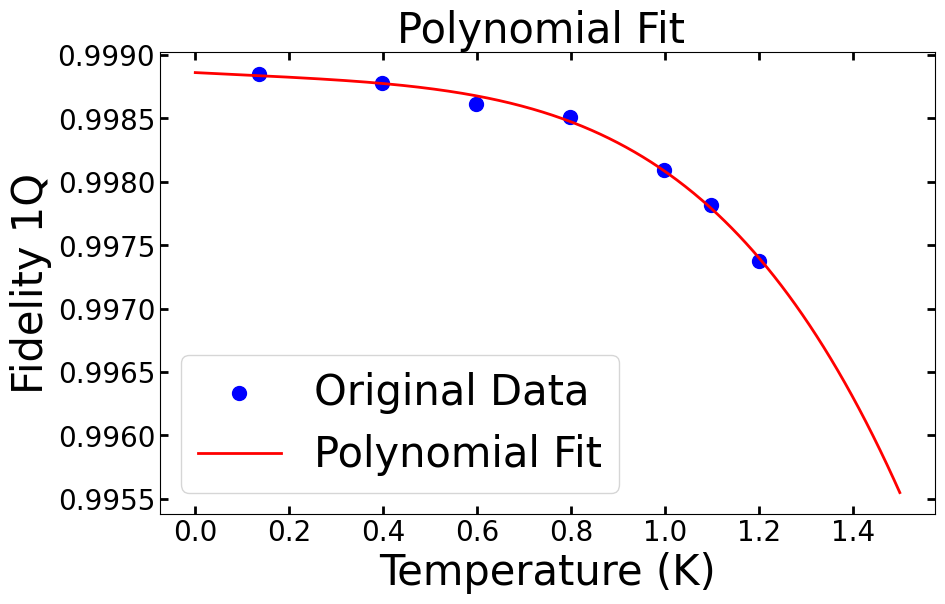

In [22]:
plot_data_and_fit(x_values, y_values, polynomial)

In [92]:
from typing import List
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from loguru import logger

def fit_polynomial(data_x: List[float], data_y: List[float]) -> Polynomial:
    logger.info(f"Data x: {data_x}")
    logger.info(f"Data y: {data_y}")

    # Formulate the design matrix with x^0, x^2, and x^4 terms
    x_values = np.array(data_x)
    y_values = np.array(data_y)
    X = np.vstack([np.ones_like(x_values), x_values**2, x_values**4]).T

    # Perform least squares polynomial fit for the x^0, x^2, and x^4 terms
    coefs, _, _, _ = np.linalg.lstsq(X, y_values, rcond=None)
    poly = Polynomial([coefs[0], 0, coefs[1], 0, coefs[2]])

    # Compute the fitted values
    y_fitted = np.dot(X, coefs)

    # Calculate residuals
    residuals = y_values - y_fitted

    # Compute RSS (Residual Sum of Squares)
    RSS = np.sum(residuals**2)

    # Compute TSS (Total Sum of Squares)
    TSS = np.sum((y_values - np.mean(y_values))**2)

    # Compute R-squared
    R_squared = 1 - (RSS / TSS)

    # Log the results
    logger.info(f"RSS: {RSS}")
    logger.info(f"R-squared: {R_squared}")

    return poly

# Example usage
data_x = [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
data_y = [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]

polynomial = fit_polynomial(data_x, data_y)
logger.info(f"Polynomial: {polynomial}")

2024-07-03 15:29:07.309 | INFO     | __main__:fit_polynomial:7 - Data x: [0.13595473785487275, 0.3974260941764538, 0.5983893453314294, 0.7978210439802411, 0.9976970611583134, 1.0977326851818083, 1.199454699986816]
2024-07-03 15:29:07.310 | INFO     | __main__:fit_polynomial:8 - Data y: [0.9988513496455832, 0.9987824353928882, 0.9986153839680675, 0.9985089326537656, 0.9980947907579504, 0.99782012112168, 0.9973776258692122]
2024-07-03 15:29:07.311 | INFO     | __main__:fit_polynomial:35 - RSS: 8.360029408929738e-09
2024-07-03 15:29:07.311 | INFO     | __main__:fit_polynomial:36 - R-squared: 0.9953624203093442
2024-07-03 15:29:07.312 | INFO     | __main__:<module>:45 - Polynomial: 0.99882531 + 0.0·x - 0.00018865·x² + 0.0·x³ - 0.00055588·x⁴


In [95]:
def plot_data_and_fit(x_values: List[float], y_values: List[float], polynomial: Polynomial):
    # Generate a range of x values for plotting the fit
    x_fit = np.linspace(0, 1.5, 500)
    y_fit = polynomial(x_fit)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot original data points
    plt.scatter(x_values, y_values, color='blue', s=100, label='Original Data')
    
    # Plot polynomial fit
    plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Polynomial Fit')
    logger.info(f"Max fidelity according to model: {np.max(y_fit)}")
    logger.info(f"Poly roots: {polynomial.roots()}")
    
    # Set labels, title, and legend
    plt.xlabel('Temperature (K)', fontsize=30)
    plt.ylabel('Fidelity 1Q', fontsize=30)
    plt.title('Polynomial Fit ', fontsize=30)
    plt.legend(fontsize=30)
    
    poly_str = polynomial_to_string(polynomial)
    plt.text(0.4, -0.3, f'{poly_str}', fontsize=30, transform=plt.gca().transAxes, ha='center')
    # Set tick size and thickness
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tick_params(axis='both', which='both', direction='in', length=6, width=2, top=True, right=True, labelsize=20)
    
    # Save and show the plot
    plt.savefig('data_fit_x2x4.pdf', bbox_inches='tight')
    plt.show()

2024-07-03 15:34:59.831 | INFO     | __main__:plot_data_and_fit:14 - Max fidelity according to model: 0.9988253090643081
2024-07-03 15:34:59.832 | INFO     | __main__:plot_data_and_fit:15 - Poly roots: [-6.49766734e+00+0.j         -1.13551519e-15-6.52373002j
 -1.13551519e-15+6.52373002j  6.49766734e+00+0.j        ]


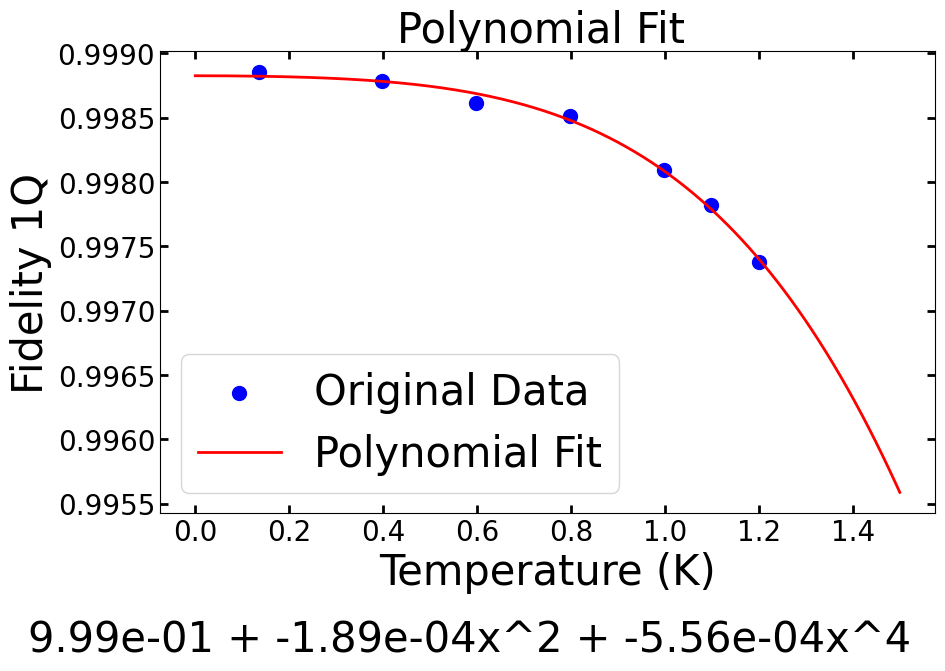

In [96]:
plot_data_and_fit(x_values, y_values, polynomial)

In [215]:
def fidelity(T, f_rabi, model='Model 1'):
    if model == 'Model 1':
        # Rabi**4
        poly_coeff= np.array([ 5.09137534e+21, -2.77520845e+21,  1.40261875e+22, -1.85030980e+22, 1.02776058e+22])
        my_poly = Polynomial(poly_coeff)
        fidelity = 1-(my_poly(T)/f_rabi**4)
    elif model == 'Model 2':
        # Rabi
        poly_coeff= np.array([ 1705.09129852,  -929.4116949 ,  4697.34182489, -6196.65008002, 3441.94938684])
        my_poly = Polynomial(poly_coeff)
        fidelity = 1-(my_poly(T)/f_rabi)
    else:
        raise ValueError("Invalid trend value. Please choose either 'Model 1' or 'Model 2'.")

    return fidelity

In [216]:
def plot_data_and_newfit(x_values: List[float], y_values: List[float], polynomial: Polynomial):
    
    # Generate a range of x values for plotting the fit
    x_fit = np.linspace(min(x_values), max(x_values), 500)
    # y_fit = polynomial(x_fit+0.15)-0.00005
    y_fit = fidelity(x_fit, f_rabi=1.44e6, trend='Model 2')
    
    # Plot original data points
    plt.scatter(x_values, y_values, color='blue', label='Original Data')
    
    # Plot polynomial fit
    plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
    
    plt.xlabel('Temperature (K)')
    plt.ylabel('P_err')
    plt.title('Original Data and Polynomial Fit')
    # plt.savefig('fit_T2-restricted.pdf')
    plt.legend()
    plt.show()

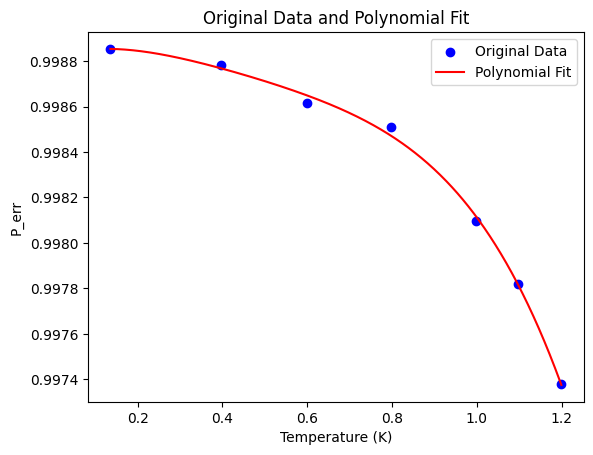

In [217]:
plot_data_and_newfit(x_values, y_values, polynomial)

In [146]:
poly_coeff_f4= np.array([ 0.00118409, -0.00064542,  0.00326204, -0.00430323,  0.00239024])


In [18]:
print( polynomial)

1705.09129852 - 929.4116949·x + 4697.34182489·x² - 6196.65008002·x³ +
3441.94938684·x⁴


In [207]:
polynomial.coef

array([ 1705.09129852,  -929.4116949 ,  4697.34182489, -6196.65008002,
        3441.94938684])

In [147]:
Polynomial(poly_coeff)

Polynomial([ 0.00118409, -0.00064542,  0.00326204, -0.00430323,  0.00239024], domain=[-1,  1], window=[-1,  1], symbol='x')

Fitted parameters: a = 0.03615406325550507, b = 0.04154437182069211, c = -0.004057196113169211


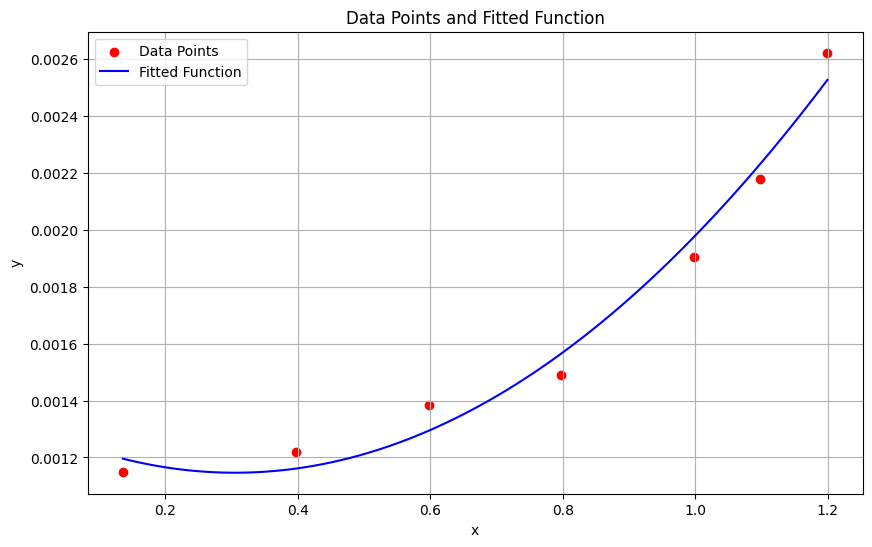

In [88]:
# Define the model function
def model_function(x, a, b, c):
    f = 1.44e6
    return (a + b * x)**(2) + c*x

# Fit the curve
popt, pcov = curve_fit(model_function, x_values, y_values)

# Extract the fitting parameters
a, b, c = popt

print(f"Fitted parameters: a = {a}, b = {b}, c = {c}")

# Define the function y(x) using the fitted parameters
def y_function(x):
    return (a + b * x)**2 + c*x

# Generate y values for the fitted curve
x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = y_function(x_fit)

# Plot the data points and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.plot(x_fit, y_fit, color='blue', label='Fitted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Fitted Function')
plt.legend()
plt.grid(True)
plt.show()

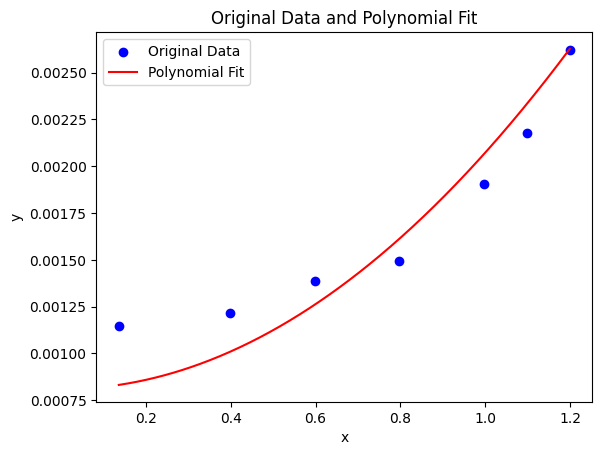

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from numpy.polynomial import Polynomial
from scipy.optimize import minimize

def constrained_polyfit(x: np.ndarray, y: np.ndarray, degree: int):
    def objective(coef):
        return np.sum((np.polyval(coef, x) - y) ** 2)

    initial_guess = np.polyfit(x, y, degree)
    
    constraints = [{'type': 'ineq', 'fun': lambda coef: coef[-2]},  # a >= 0
                   {'type': 'ineq', 'fun': lambda coef: coef[-1]}]  # b >= 0
    
    result = minimize(objective, initial_guess, constraints=constraints)
    return result.x

def plot_data_and_fit(x_values: List[float], y_values: List[float], coefficients: np.ndarray):
    # Generate a range of x values for plotting the fit
    x_fit = np.linspace(min(x_values), max(x_values), 500)
    y_fit = np.polyval(coefficients, x_fit)
    
    # Plot original data points
    plt.scatter(x_values, y_values, color='blue', label='Original Data')
    
    # Plot polynomial fit
    plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original Data and Polynomial Fit')
    plt.legend()
    plt.show()

# Example usage


coefficients = constrained_polyfit(np.array(x_values), np.array(y_values), 2)
plot_data_and_fit(x_values, y_values, coefficients)

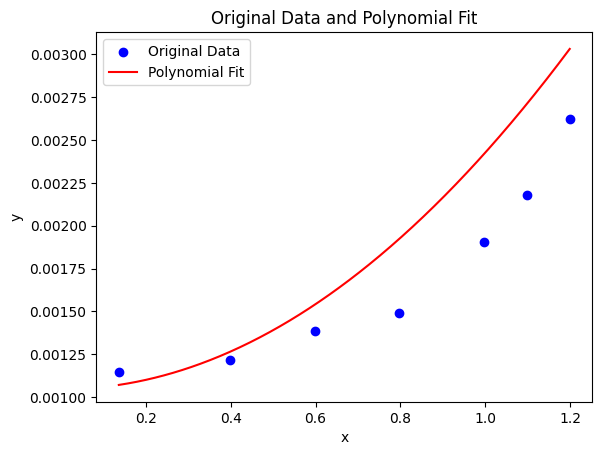

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.optimize import minimize

def constrained_polyfit(x: np.ndarray, y: np.ndarray, degree: int, alpha: float = 0.1):
    def objective(coef):
        # Sum of squared errors
        error = np.sum((np.polyval(coef, x) - y) ** 2)
        # Regularization term to penalize large coefficients
        penalty = alpha * np.sum(coef ** 2)
        return error + penalty

    initial_guess = np.polyfit(x, y, degree)
    
    constraints = [{'type': 'ineq', 'fun': lambda coef: coef[-2]},  # a >= 0
                   {'type': 'ineq', 'fun': lambda coef: coef[-1]}]  # b >= 0
    
    result = minimize(objective, initial_guess, constraints=constraints)
    return result.x

def plot_data_and_fit(x_values: List[float], y_values: List[float], coefficients: np.ndarray):
    # Generate a range of x values for plotting the fit
    x_fit = np.linspace(min(x_values), max(x_values), 500)
    y_fit = np.polyval(coefficients, x_fit)
    
    # Plot original data points
    plt.scatter(x_values, y_values, color='blue', label='Original Data')
    
    # Plot polynomial fit
    plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original Data and Polynomial Fit')
    plt.legend()
    plt.show()

# Example usage
# x_values = [1, 2, 3, 4, 5]
# y_values = [2, 3, 5, 7, 11]

coefficients = constrained_polyfit(np.array(x_values), np.array(y_values), 2, alpha=0.1)
plot_data_and_fit(x_values, y_values, coefficients)

/Users/konstantinakoteva/projects/spin-qe/.venv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


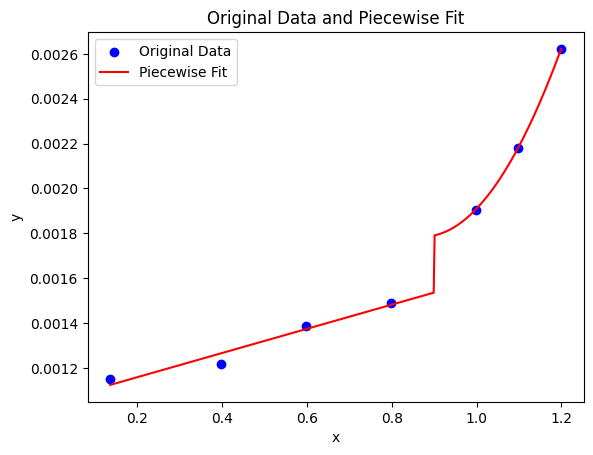

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from typing import List, Tuple

def piecewise_func(x, x0, a1, b1, a2, b2, c2):
    return np.piecewise(x, [x < 0.9, x >= 0.9],
                        [lambda x: a1 * x + b1,
                         lambda x: a2 * x**2 + b2 * x + c2])

def fit_piecewise(x: np.ndarray, y: np.ndarray):
    # Initial guess for the parameters
    p0 = [np.median(x), 1, 1, 1, 1, 1]
    
    params, _ = curve_fit(piecewise_func, x, y, p0)
    return params

def plot_data_and_piecewise_fit(x_values: List[float], y_values: List[float], params: Tuple):
    x_fit = np.linspace(min(x_values), max(x_values), 500)
    y_fit = piecewise_func(x_fit, *params)
    
    plt.scatter(x_values, y_values, color='blue', label='Original Data')
    plt.plot(x_fit, y_fit, color='red', label='Piecewise Fit')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original Data and Piecewise Fit')
    plt.legend()
    plt.show()



params = fit_piecewise(np.array(x_values), np.array(y_values))
plot_data_and_piecewise_fit(x_values, y_values, params)